In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('timings_v2k_old.csv')
df = df[['k', 'size', 'timing']]
df.head()

,k,size,timing
0,1,1000,0.263254
1,1,2000,0.340766
2,1,3000,0.391325
3,1,4000,0.463645
4,1,5000,0.474248


In [ ]:
def plot(fit=False):
    A = []
    B = []
    for i in range(1, 11):
        da = df[df['k'] == i]
        x = da['size']
        y = da['timing']
        if fit:
            a, b = np.polyfit(x, y, 3)
            A.append(a)
            B.append(b)
            y = a*x+b
        plt.plot(x, y, label=f'k={i}')
    plt.legend(loc='upper left')
    plt.title(f'Running time vs data set size vs k')
    plt.xlabel('size')
    plt.ylabel('seconds')

    if fit:
        plt.figure()
        plt.scatter(range(len(A)), A)
        plt.figure()
        plt.scatter(range(len(A)), B)

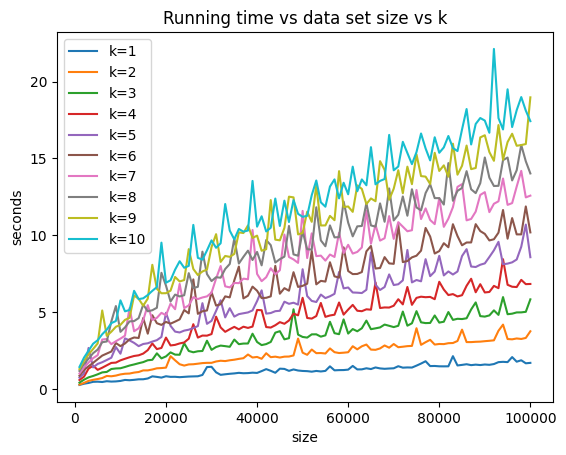

In [4]:
plot()

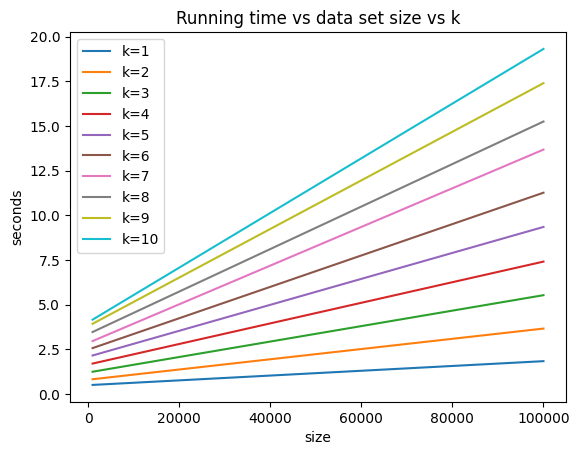

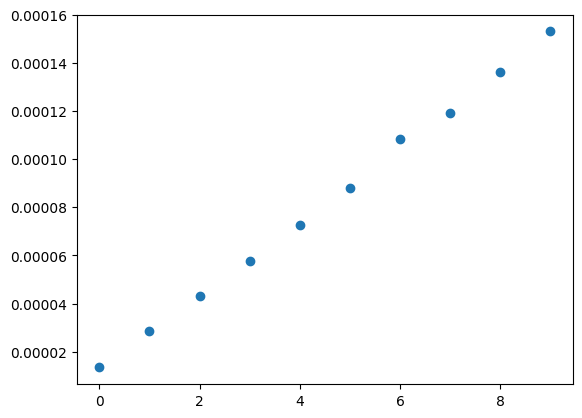

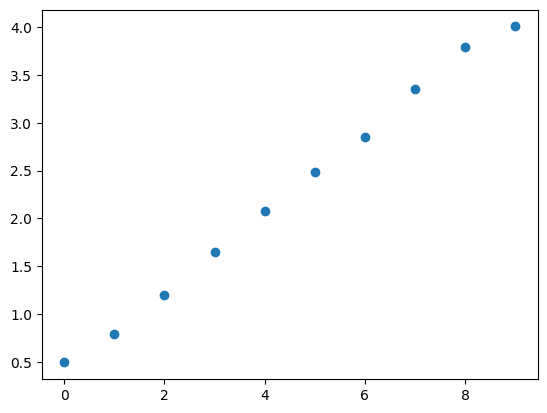

In [5]:
plot(True)